# Libraries

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dowhy import CausalModel
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Loading Dataset

In [30]:
# Load IBM HR Analytics Employee Attrition dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preview of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Look at Dataset

In [24]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
# Get descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
# List of all the columns
for col in df.columns.tolist():
    print(col)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


# Transform the categorical features to numeric 

In [31]:
# Transforming the categorical features to numeric features using Label Encoder
for col in df.columns.tolist():
    if df[col].dtype == object:
        label_encoder = preprocessing.LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

{'No': 0, 'Yes': 1}


# Features Correlation

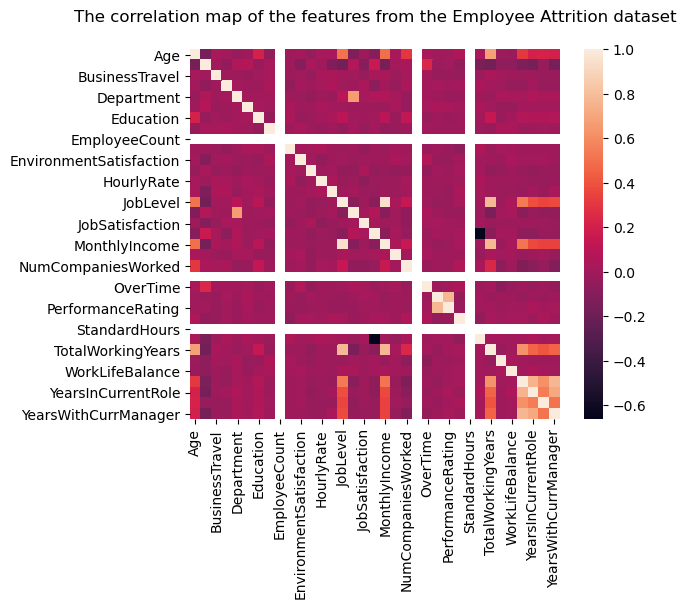

In [17]:
correlation_matrix = df.corr()

htmp = sns.heatmap(data=correlation_matrix, square=True)

plt.title("The correlation map of the features from the Employee Attrition dataset", pad=20)
plt.show()

In [20]:
# Find most correlated features to Attrition
y = "Attrition"
correlations = correlation_matrix[y]
correlations = correlations.drop(y)

# Sort correlations (ascending=False for highest positive correlations)
correlated_features = correlations.sort_values(ascending=False)

# Print the most correlated features with the target feature
print(correlated_features)

OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [21]:
# List of most correlated to Attrition
threshold = 0.1

strong_correlations = correlations[correlations.abs() > threshold]

most_correlated_features = strong_correlations.index.tolist()

most_correlated_features

['Age',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

# Plotting most Correlated features to Attrition

In [32]:
# Select relevant features
df = df[most_correlated_features+[y]]

# Drop missing values if necessary
df.dropna(inplace=True)

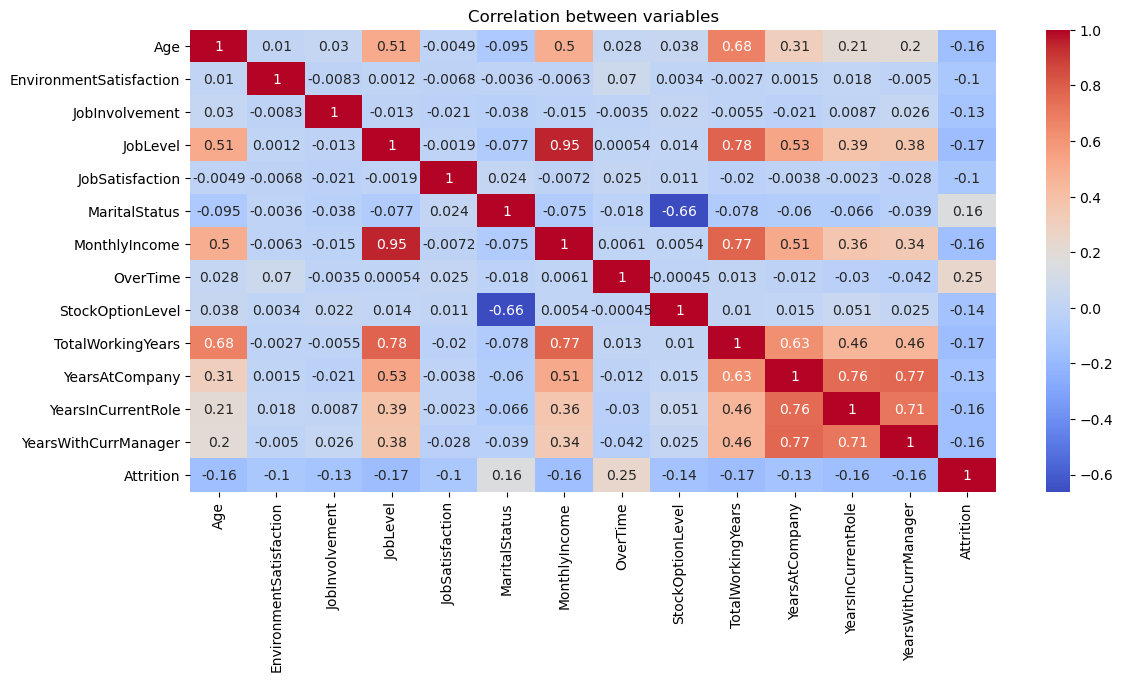

In [36]:
# Correlation heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

# Features Underlying Distribution and Scaling 

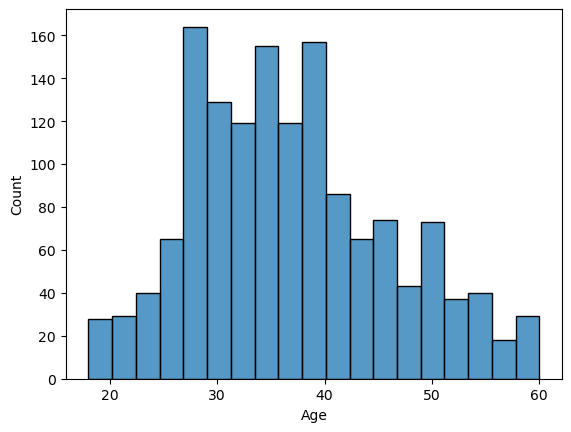

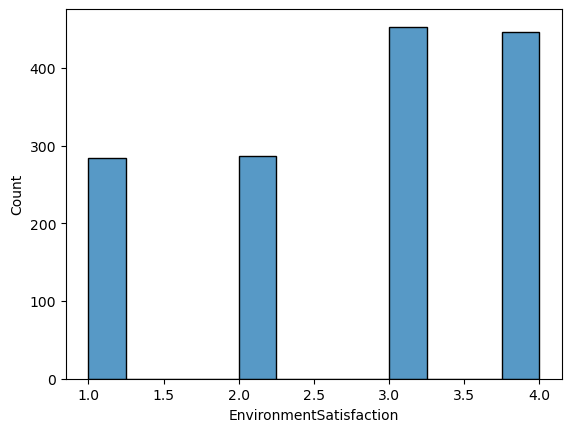

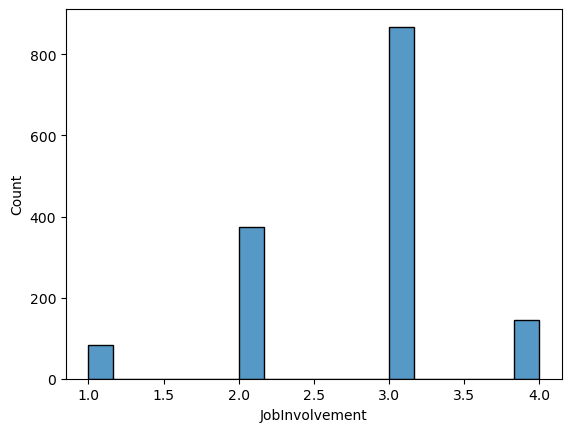

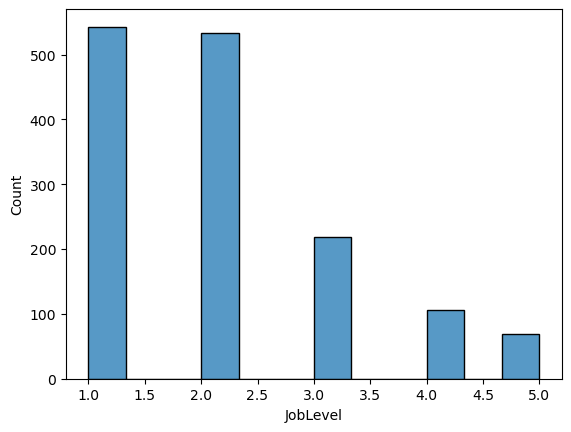

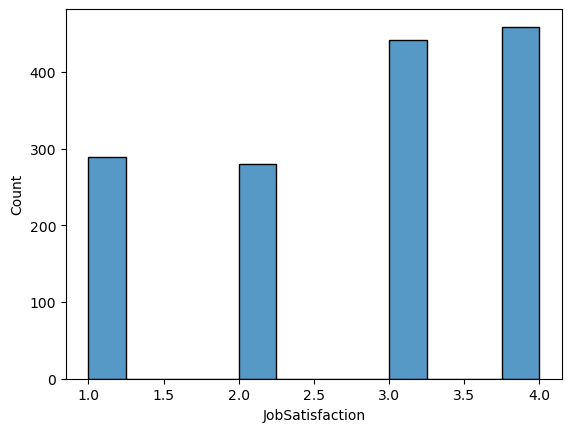

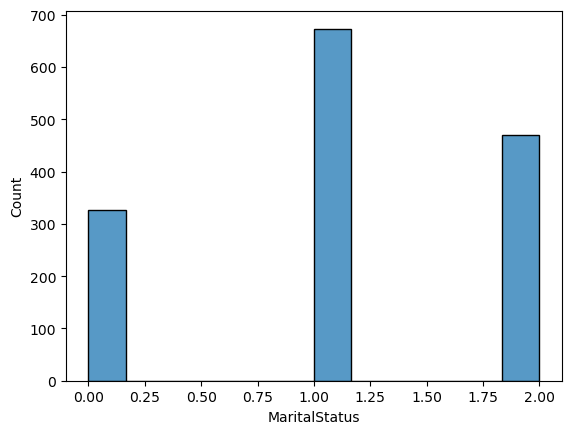

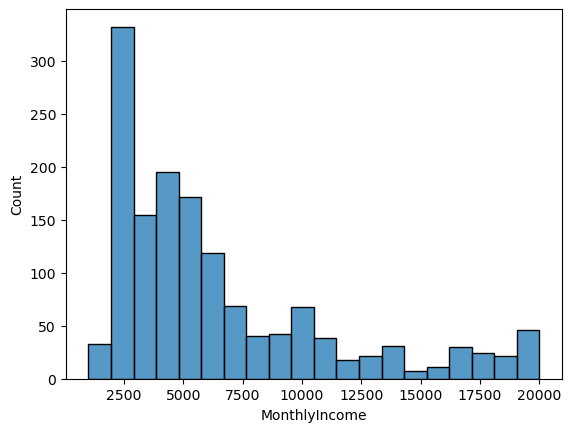

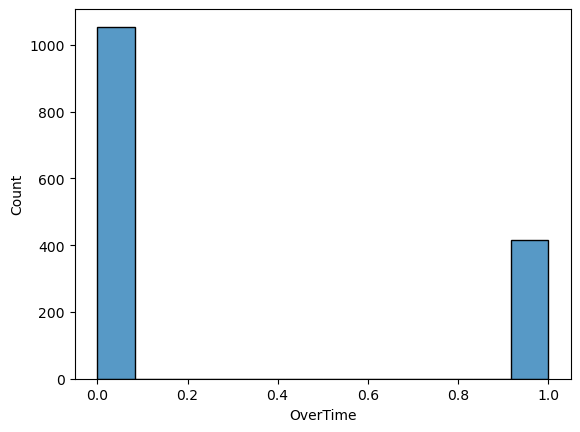

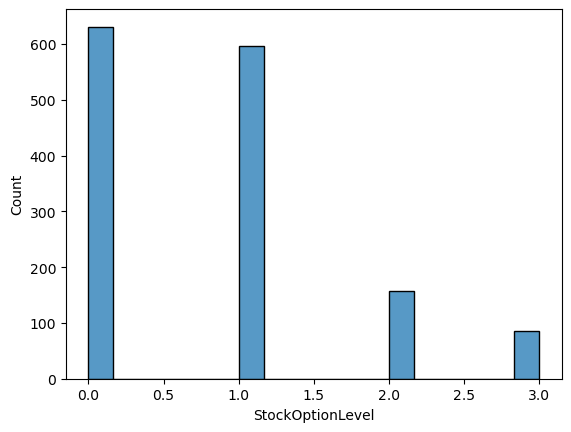

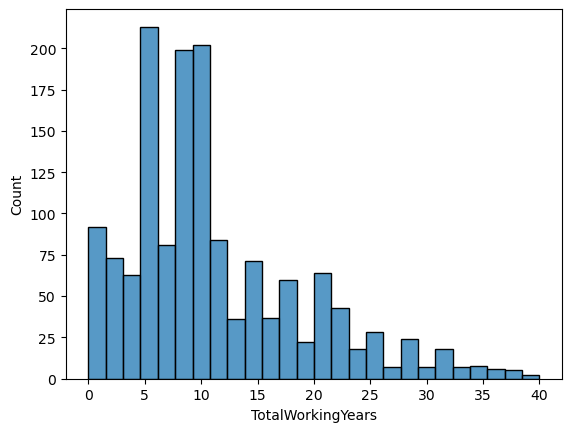

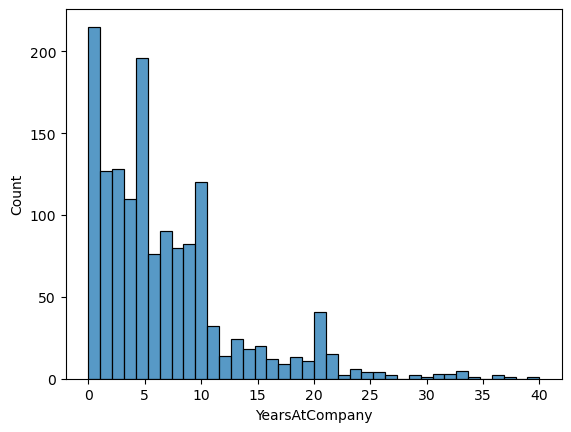

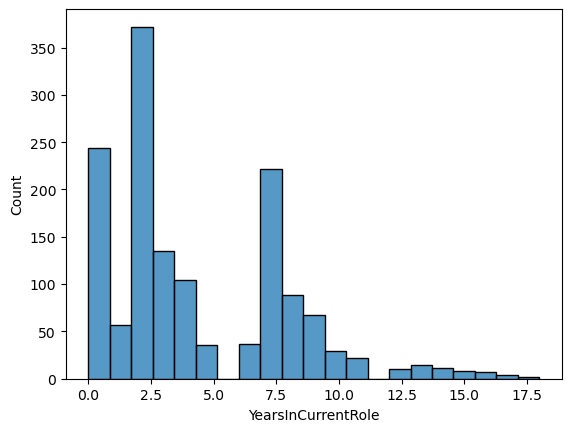

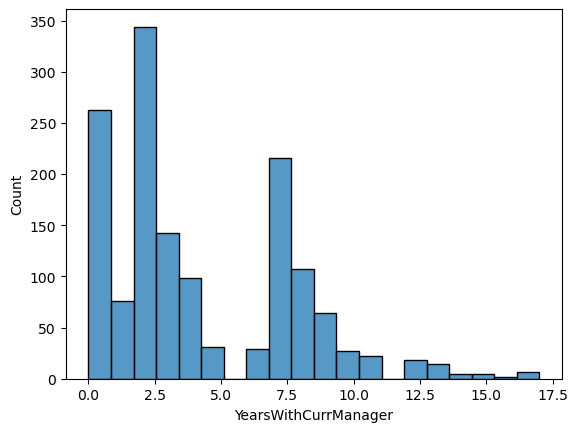

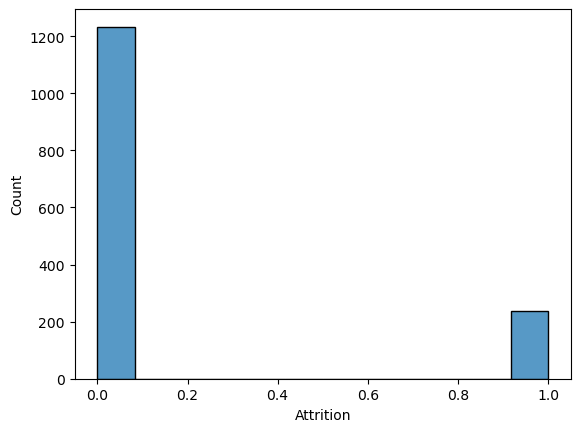

In [57]:
# Investigate the underlying distribution
for col in df.columns.tolist():
    sns.histplot(data=df[col])
    plt.show()

In [71]:
# Scale only the non-categorical features
# Only 'Age' is normally distributed
numeric_features_gaussian = ['Age']
numeric_features_non_gaussian = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']

# Scale
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
# Apply StandardScaler to Guassian featuresg
scaled_age = standard_scaler.fit_transform(df[numeric_features_gaussian])

# Apply MinMaxScaler to Other features
scaled_others = minmax_scaler.fit_transform(df[numeric_features_non_gaussian])

# Convert scaled arrays back to DataFrames
scaled_age_df = pd.DataFrame(scaled_age, columns=numeric_features_gaussian)
scaled_others_df = pd.DataFrame(scaled_others, columns=numeric_features_non_gaussian)

# Concatenate the scaled DataFrames
scaled_data = pd.concat([scaled_others_df, scaled_age_df], axis=1)

# Concatenate the categorical columns to the scaled dataframe
scaled_df = pd.concat([scaled_data, df.loc[:, ~df.columns.isin(scaled_data.columns.tolist())]], axis=1)

In [72]:
scaled_df

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,Attrition
0,0.262454,0.200,0.150,0.222222,0.294118,0.446350,2,3,2,4,2,1,0,1
1,0.217009,0.250,0.250,0.388889,0.411765,1.322365,3,2,2,2,1,0,1,0
2,0.056925,0.175,0.000,0.000000,0.000000,0.008343,4,2,1,3,2,1,0,1
3,0.100053,0.200,0.200,0.388889,0.000000,-0.429664,4,3,1,3,1,1,0,0
4,0.129489,0.150,0.050,0.111111,0.117647,-1.086676,1,3,1,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.082254,0.425,0.125,0.111111,0.176471,-0.101159,3,4,2,4,1,0,1,0
1466,0.472986,0.225,0.175,0.388889,0.411765,0.227347,4,2,3,1,1,0,1,0
1467,0.270300,0.150,0.150,0.111111,0.176471,-1.086676,2,4,2,2,1,1,1,0
1468,0.230700,0.425,0.225,0.333333,0.470588,1.322365,4,2,2,2,1,0,0,0


# Fitting the data to the Causal Model

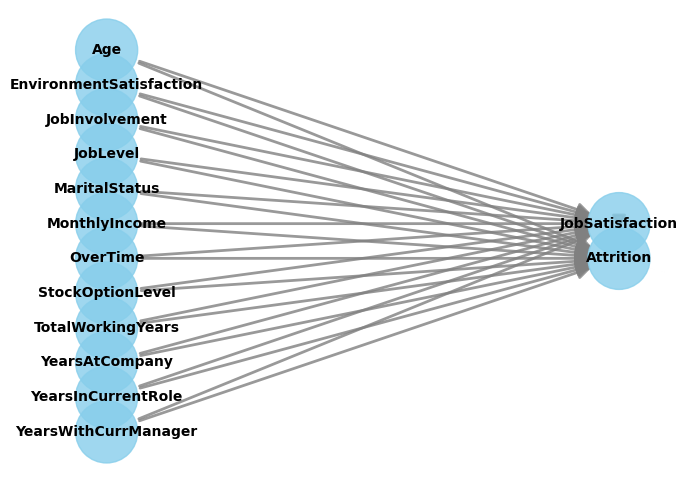

In [73]:
# Create a causal model
model = CausalModel(
    data=scaled_df,
    treatment='JobSatisfaction',
    outcome='Attrition',
    common_causes=['Age','EnvironmentSatisfaction','JobInvolvement','JobLevel','MaritalStatus','MonthlyIncome','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
)

# Visualize the causal graph
model.view_model()

# Identifying effects and making estimations

In [74]:
# Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# Estimate the causal effect using the backdoor criterion
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print(f"Causal Estimate: {estimate.value}")


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                                                                                                                                                  ↪
──────────────────(E[Attrition|Age,OverTime,StockOptionLevel,MonthlyIncome,YearsAtCompany,JobInvolvement,MaritalStatus,YearsWithCurrManager,YearsInCurrentRole,JobLevel,EnvironmentSatisfaction,TotalWorki ↪
d[JobSatisfaction]                                                                                                                                                                                         ↪

↪          
↪ ngYears])
↪          
Estimand assumption 1, Unconfoundedness: If U→{JobSatisfaction} and U→Attrition then P(Attrition|JobSatisfaction,Age,OverTime,StockOptionLevel,MonthlyIncome,YearsAtCompany,JobInvolvement,MaritalStatus,YearsWithCurrManager,YearsInCurrentRol

In [75]:
# Refute the estimate using placebo treatment
refute_result = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_result)

# Refute the estimate using data subset refuter
refute_result = model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
print(refute_result)


Refute: Use a Placebo Treatment
Estimated effect:-0.03973173847567216
New effect:0.0004051326605947124
p value:0.98

Refute: Use a subset of data
Estimated effect:-0.03973173847567216
New effect:-0.03948358091965019
p value:0.96



In [76]:
# Step 1: Identify the estimand (the causal query)
identified_estimand = model.identify_effect()

# Step 2: Estimate the causal effect using the backdoor linear regression method
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Step 3: Print the estimated causal effect
print(f"Causal Estimate: {estimate.value}")

# Step 4: Simulate an intervention by manually changing JobSatisfaction
# Instead of binary treatment (which PSM requires), use continuous treatment.
# Here, we'll assume JobSatisfaction changes to 4 for everyone, but still use linear regression.

# Modify the original dataset to simulate JobSatisfaction being set to 4
new_data = df.copy()
new_data['JobSatisfaction'] = 4  # Simulate that all employees have a JobSatisfaction of 4

# Use the modified dataset to re-estimate the effect under the intervention scenario
intervention_effect = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",  # Use linear regression as the estimator
    control_value=0,   # Baseline value for the control (this can be your average or other reference value)
    treatment_value=4  # The new value for JobSatisfaction after intervention
)

# Step 5: Print the results of the intervention
print(f"Expected Attrition Rate after Intervention: {intervention_effect.value}")


Causal Estimate: -0.03973173847567216
Expected Attrition Rate after Intervention: -0.15892695390268854


In [77]:
# Summary of results
print(f"The estimated causal effect of JobSatisfaction on Attrition is: {estimate.value}.")
print(f"After simulating an increase in JobSatisfaction, the predicted attrition rate is: {intervention_effect.value}.")

The estimated causal effect of JobSatisfaction on Attrition is: -0.03973173847567216.
After simulating an increase in JobSatisfaction, the predicted attrition rate is: -0.15892695390268854.
